# 타이타닉 데이터 EDA

##문제정의
타이타닉 호에 승선했던 탑승자 정보를 바탕으로 탑승자들의 생존과 관련된 데이터들을 분석과 시각화를 하기위한 프로젝트

## 타이타닉 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## 타이타닉 탑승자 데이터 불러오기

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 데이터 로딩 및 확인
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/프로젝트오리엔테이션/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


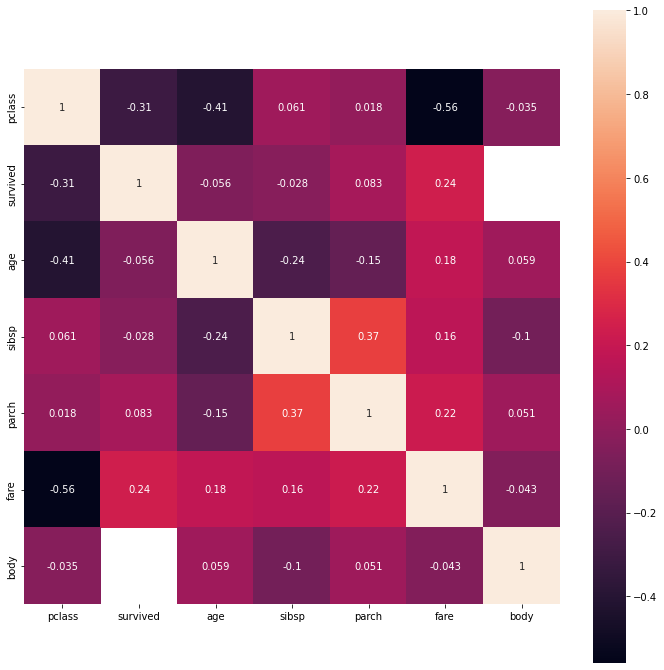

In [4]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, square=True)
plt.show()

- 상관관계를 봤을때 생존률(survived)과는 객실 등급(pclass)과 높은 관련이 있어보인다 
- 여기에선 나오지는 않았지만 성별(sex)과도 관련이 있다고 생각하기에 분석이 필요해 보인다
- 형제 혹은 부부의 수(sibsp)와의 상관관계도 확인해볼 필요가 있다 
- 부모, 혹은 자녀의 수(parch)와의 상관관계도 확인해볼 필요가 있다

## 데이터 결측값 확인하고 처리하기


In [5]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# 결측치 갯수 확인
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# 결측치 비율 확인 
df.isna().sum() / len(df) * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

###나이 결측치 채우기
- 0으로 채울까
- 성별에 따른 나이의 평균으로 채울까
- 객실 등급에 따른 나이의 평균으로 채울까

In [8]:
df[df['age'].notnull()].groupby(['sex'])['age'].mean()

sex
female    28.687088
male      30.585228
Name: age, dtype: float64

성별에 따른 나이의 평균차가 그리 크지않다

In [9]:
df[df['age'].notnull()].groupby(['pclass'])['age'].mean()

pclass
1    39.159930
2    29.506705
3    24.816367
Name: age, dtype: float64

객실 등급에 따른 나이의 평균차가 확연히 드러나는걸로 봐서 
객실 등급에 따른 나이의 평균차로 결측치를 채워준다

In [10]:
df['age'].fillna(df.groupby('pclass')['age'].transform('mean'), inplace=True)

In [11]:
df.isna().sum() / len(df) * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age           0.000000
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

###나머지 결측치 분석과 처리

In [12]:
# 지불한 운임(fare)은 평균값으로 채워주고 선착정보(embarked)는 non-null 값으로 채워준다
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['embarked'].fillna(method='ffill', inplace=True)

In [13]:
df.isna().sum() / len(df) * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age           0.000000
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.000000
cabin        77.463713
embarked      0.000000
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

- cabin : 객실정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

4가지 정보들의 결측비율이 너무 크다

4가지 정보들은 이 프로젝트에서 목표로하는 생존률과의 관계가 없다고 보여짐으로써 불필요한 컬럼들로 판단된다.

따라서 불필요한 컬럼들을 제거하고 데이터를 처리할 필요가 있어보인다

###불필요한 컬럼들 제거하기

In [14]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [15]:
del df['cabin']

In [16]:
del df['boat']

In [17]:
del df['body']

In [18]:
del df['home.dest']

In [19]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [20]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S


In [21]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.348219,0.498854,0.385027,33.295479
std,0.837836,0.486055,13.127850,1.041658,0.865560,51.738879
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,37.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


##데이터 분석하기

###전체 생존률

In [22]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [23]:
print('생존률 :', df['survived'].mean() * 100)

생존률 : 38.19709702062643


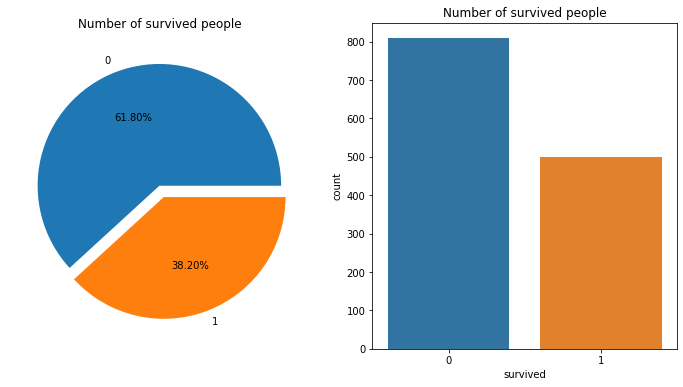

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%')
plt.title('Number of survived people')
plt.ylabel('')
plt.subplot(1,2,2)
sns.countplot(df.survived)
plt.title('Number of survived people')
plt.show()

1309명중에서 500명이 생존하였고 
그 수치는 약 38퍼센트로 나타난다

###이름(name) 분석

In [25]:
df['title']=''
for i in range(len(df['name'])):
  df['title'][i] = df['name'][i].split(',')[1].split('.')[0].upper()


In [26]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,MISS
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,MASTER
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,MISS
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,MR
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,MRS


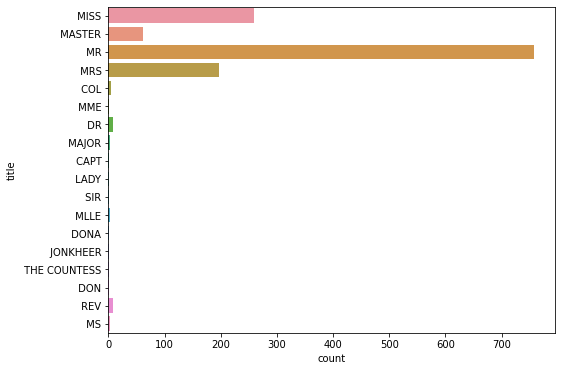

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='title')
plt.show()

Mr 호칭이 많고

4가지의 호칭의 수가 많다

###객실 등급(pclass)에 따른 생존률

Predictions and assumptions
- 객실 등급(pclass)이 높을수록 지불한 운임(fare)가 높다
- 객실 등급이 높을수록 객실 안이 더욱더 안전하다
- 객실 등급이 높을수록 구조대가 먼저 구해줄 확률이 높다

그러므로 객실 등급이 높을수록 생존률은 높을것이다 

In [28]:
# 객실 등급으로 구분한 사람수
df['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [29]:
# 객실 등급에 따른 생존한 사람들의 수 
pd.crosstab(df.pclass, df.survived, margins=1)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


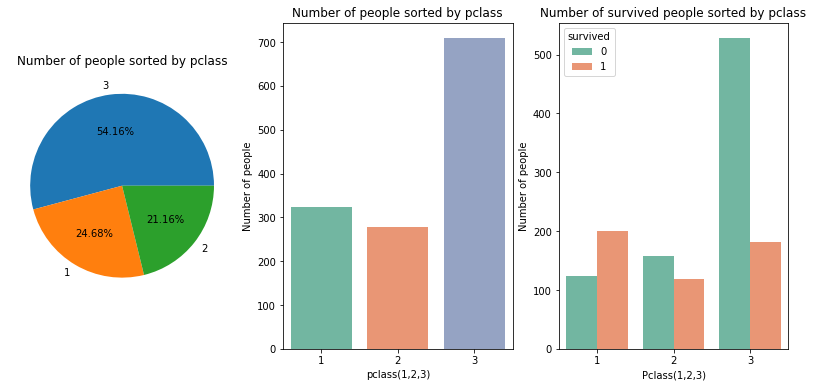

In [30]:
# pclass 와 survived의 상관관계를 countplot으로 표시
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
df['pclass'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Number of people sorted by pclass')
plt.ylabel('')
plt.subplot(1,3,2)
sns.countplot(data = df, x ='pclass', palette='Set2')
plt.title('Number of people sorted by pclass')
plt.xlabel('pclass(1,2,3)')
plt.ylabel('Number of people')
plt.subplot(1,3,3)
sns.countplot(data = df, x = 'pclass', hue = 'survived', palette='Set2')
plt.title('Number of survived people sorted by pclass')
plt.xlabel('Pclass(1,2,3)')
plt.ylabel('Number of people')
plt.show()

In [31]:
# 객실 등급에 따른 생존률 
df[['pclass', 'survived']].groupby('pclass').mean()*100

,survived
pclass,
1,61.919505
2,42.960289
3,25.528914


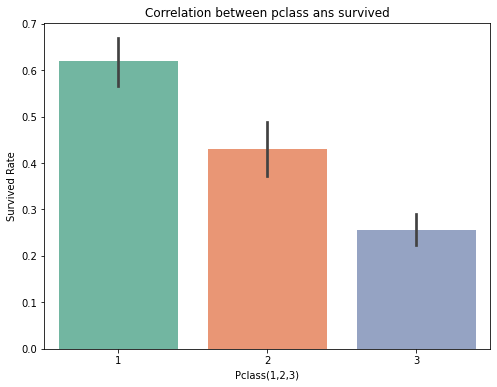

In [32]:
from seaborn import palettes
# 객실 등급에 따른 생존률 
plt.figure(figsize=(8,6))
sns.barplot(df.pclass, df.survived, palette='Set2')
plt.title('Correlation between pclass ans survived')
plt.xlabel('Pclass(1,2,3)')
plt.ylabel('Survived Rate')
plt.show()

- 객실 1등급 생존비율은 약 62퍼센트
- 객실 2등급 생존비율은 약 43퍼센트
- 객실 3등급 생존비율은 약 26퍼센트

따라서 객실 등급이 높을 수록 생존비율이 높을것이라는 예상에 맞는 결과가 나왔다

결론: 객실 등급은 생존률에 영향을 미친다

### 성별(sex)에 따른 생존률

Predictions and assumptions
- 여자들에 비해 남자들이 체력이 좋고 힘이 쎄므로 침몰위기에서 상대적으로 잘 벗어났을거같다
          VS
- 남자들이 여자들을 먼저 구조했다

In [33]:
# 성별의 요소들
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [34]:
# 성별에 따른 사람수
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [35]:
# 성별에 따른 사람들의 생존수
pd.crosstab(df.sex, df.survived, margins=1)

survived,0,1,All
sex,,,
female,127,339,466
male,682,161,843
All,809,500,1309


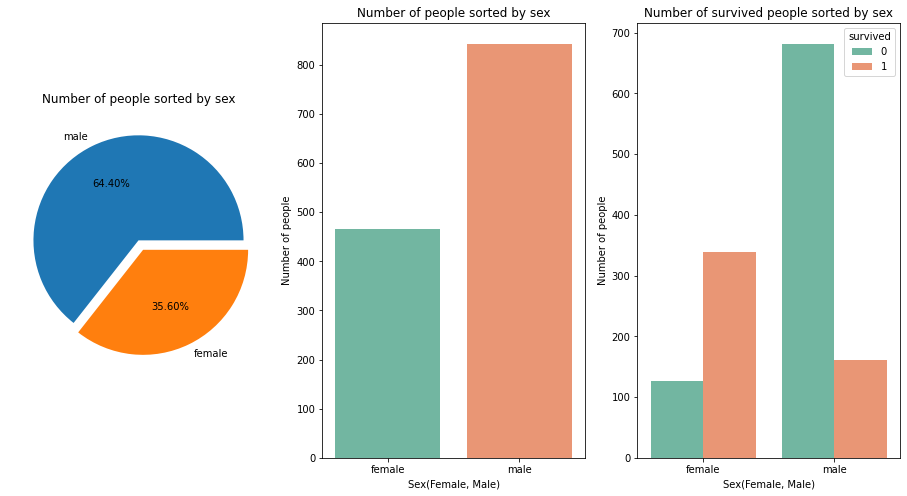

In [36]:
# sex 와 survived의 상관관계를 countplot으로 표시
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%')
plt.title('Number of people sorted by sex')
plt.ylabel('')
plt.subplot(1,3,2)
sns.countplot(data = df, x ='sex', palette='Set2')
plt.title('Number of people sorted by sex')
plt.xlabel('Sex(Female, Male)')
plt.ylabel('Number of people')
plt.subplot(1,3,3)
sns.countplot(data = df, x = 'sex', hue = 'survived', palette='Set2')
plt.title('Number of survived people sorted by sex')
plt.xlabel('Sex(Female, Male)')
plt.ylabel('Number of people')
plt.show()

탑승자수는 남성의 비율이 여성의 비율보다 더 높으나

생존자수는 여성의 비율이 남성의 비율보다 더 높다

In [37]:
# 성별에 따른 생존률
df[['sex', 'survived']].groupby('sex').mean()*100

,survived
sex,
female,72.746781
male,19.098458


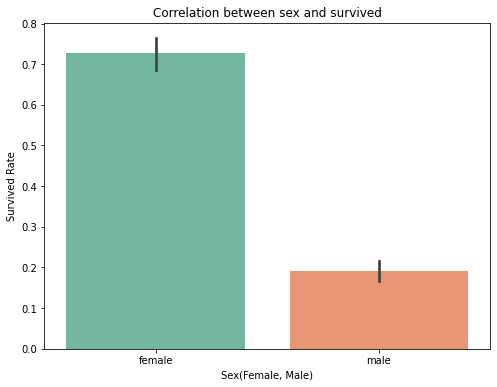

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(df.sex, df.survived, palette='Set2')
plt.title('Correlation between sex and survived')
plt.xlabel('Sex(Female, Male)')
plt.ylabel('Survived Rate')
plt.show()

여자들은 약 73퍼센트고 남자들은 약 19퍼센트로

여자들이 남자들보다 생존률이 더 높다. 

여성을 먼저 구조한것이라 예상할 수있다

결론 : 성별은 생존률에 영향을 미친다

###객실 등급과 성별에 따른 생존률

In [39]:
# 객실 등급과 성별에 따른 생존률
pd.pivot_table(df,
               index = 'pclass',
               columns = 'sex',
               values = 'survived',
               aggfunc = 'mean'
               )

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


객실 등급이 1등급이고 성별이 여자인 사람들의 생존률은 무려 97퍼센트나 된다
반면에 객실등급이 3등급이고 성별인 남자들의 생존률은 겨우 15퍼밖에 안된다

결론: 객실등급이 높을수록 생존률이 높고, 성별이 여자인 사람들의 생존률이 높다

###나이(age)에 따른 생존률

In [40]:
# 탑승객들의 나이 분포
df['age'].describe()

count    1309.000000
mean       29.348219
std        13.127850
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: age, dtype: float64

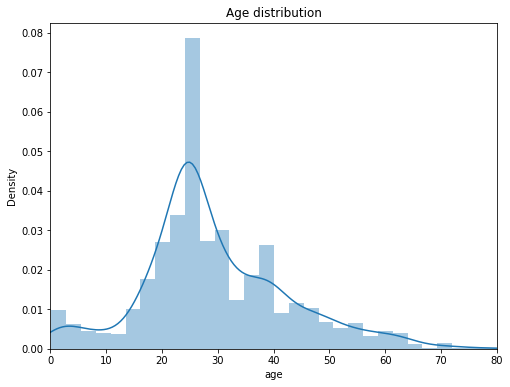

In [41]:
# 탑승객들의 나이 분포
plt.figure(figsize=(8,6))
sns.distplot(df.age)
plt.title('Age distribution')
plt.xlim(0, 80, 5)
plt.show()

어린 유아부터 최고령의 나이인 80살의 탑승객까지 다양한 연령대가 있는데

탑승객들의 평균 나이는 29살이고 

가장 많은 수의 나이는 26살이다

In [42]:
# 나이에 따른 생존률 분포
df[df['survived']==1]['age'].describe()

count    500.000000
mean      28.901948
std       14.118908
min        0.170000
25%       21.750000
50%       27.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

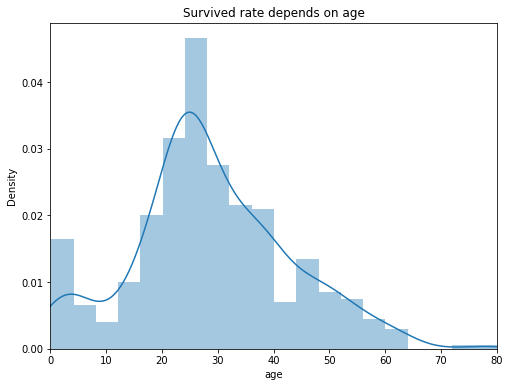

In [43]:
# 나이에 따른 생존률 분포
plt.figure(figsize=(8,6))
sns.distplot(df[df['survived']==1]['age'])
plt.title('Survived rate depends on age')
plt.xlim(0,80,5)
plt.show()

선형적인 분포를 보이고 있지는 않지만 

생존자들의 나이에서 평균 나이는 29살이고 

27살의 생존자 수가 제일 많다

30세 이후부터는 나이가 많을 수록 생존률이 낮아진다

아주 나이가 어린 영유아일 경우에는 생존률이 꽤 높은 반면

10대 탑승객의 생존률은 낮다

형제 혹은 부부의 수(sibsp)와 부모, 혹은 자녀의 수(parch) 관련지어서 분석해봐야 할것 같다

영유아의 생존률이 높은 이유는 동승한 부모들의 희생으로 아기들이 구해졌다고 가정할수 있고,

부모와 형제들 없이 혼자 탑승한 10대 탑승객들이 많았다고 가정할 수도 있다

In [44]:
# 나이를 호칭으로 나눈값들을 새로 age1에 저장하여 column에 추가한다
def age(x):
    if x < 10:
      return '영유아'
    elif x < 20:
      return '청소년'
    elif x < 30:
      return '청년'
    elif x < 50:
        return "중장년"
    else:
        return "노약자"

df['age1'] = df['age'].map( age )
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,age1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,MISS,청년
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,MASTER,영유아
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,MISS,영유아
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,MR,중장년
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,MRS,청년


In [45]:
df['age1'].value_counts()

청년     568
중장년    406
청소년    143
노약자    110
영유아     82
Name: age1, dtype: int64

In [46]:
# 나이 호칭에 따른 생존자 비율
df.groupby('age1').agg({'survived':np.mean})*100

,survived
age1,
노약자,40.000000
영유아,60.975610
중장년,41.625616
청년,31.866197
청소년,39.160839


In [47]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [48]:
plt.rc('font', family='NanumBarunGothic') 

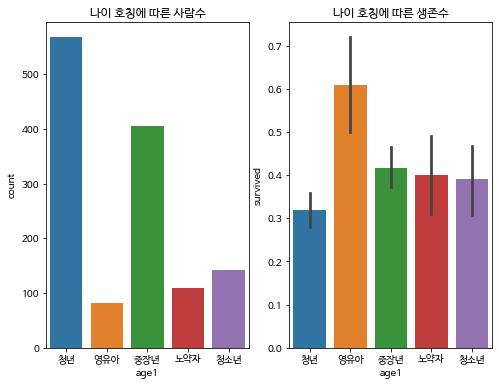

In [49]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.countplot(df.age1)
plt.title('나이 호칭에 따른 사람수')
plt.subplot(1,2,2)
sns.barplot(data=df, x='age1', y='survived')
plt.title('나이 호칭에 따른 생존수')
plt.show()

영유아들이 수는 적지만 생존비율이 제일 높고 

청년들의 수가 많아서 생존비율이 상대적으로 낮게 나온듯 하다

하지만 실제 수는 청년들이 제일 많다


##Others

###형제 혹은 부부의 수(sibsp)


In [50]:
df['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [51]:
df['sibsp'].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

형제가 혹은 부부가 없는 경우가 많으므로 0을 제외하고 plot

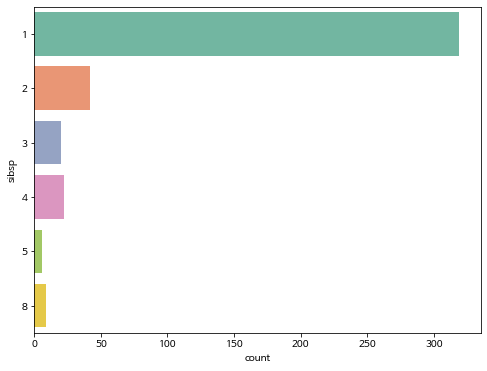

In [52]:
# 형제 혹은 부부의 수
plt.figure(figsize=(8,6))
sns.countplot(data=df, y=df.loc[df['sibsp']>0, 'sibsp'], palette="Set2")
plt.show()

형제 혹은 부부의 수가 없는 경우가 가장 많고 그 경우를 제외하면 대부분이 1명이다

In [53]:
# 형제 혹은 부부의 수가 있는경우의 평균
df.loc[df['sibsp']>0, 'sibsp'].mean()

1.562200956937799

In [54]:
df.loc[df['sibsp']>0, 'sibsp'].describe()

count    418.000000
mean       1.562201
std        1.318457
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: sibsp, dtype: float64

In [55]:
def sibsp(x):
    if x == 0:
        return "없음"
    elif x == 1:
        return "한명"
    else:
        return "많음"

df['sibsp1'] = df['sibsp'].map(sibsp)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,age1,sibsp1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,MISS,청년,없음
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,MASTER,영유아,한명
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,MISS,영유아,한명
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,MR,중장년,한명
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,MRS,청년,한명


In [56]:
df.groupby('sibsp1').agg({'survived':np.mean})

,survived
sibsp1,
많음,0.282828
없음,0.346801
한명,0.510972


형제 혹은 부모의 수가 한명이면 생존률이 높았고 

뚜렷한 상관관계는 보이지 않았다

###부모, 혹은 자녀의 수(parch)

In [57]:
df['parch'].unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

In [58]:
df['parch'].value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

In [59]:
df.loc[df['parch']>0, 'parch'].mean()

1.6416938110749186

In [60]:
df.loc[df['parch']>0, 'parch'].describe()

count    307.000000
mean       1.641694
std        1.064253
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: parch, dtype: float64

탑승객중에 부모 혹은 자녀의 수가 없는 경우가 많으므로 제외하고 plot

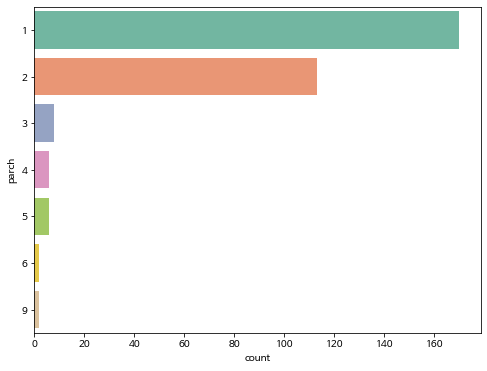

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y=df.loc[df['parch']>0, 'parch'], palette="Set2")
plt.show()

부모 혹은 자녀의 수가 없는 경우가 가장 많고, 나머지는 1명 아니면 2명이다


In [62]:
def parch(x):
    if x == 0:
        return "없음"
    elif x < 3:
        return "보통"
    else:
        return "많음"
    
df['parch1'] = df['parch'].map(parch)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,title,age1,sibsp1,parch1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,MISS,청년,없음,없음
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,MASTER,영유아,한명,보통
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,MISS,영유아,한명,보통
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,MR,중장년,한명,보통
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,MRS,청년,한명,보통


In [63]:
df.groupby('parch1').agg({'survived':np.mean})

,survived
parch1,
많음,0.291667
보통,0.554770
없음,0.335329


부모 혹은 자녀의 수가 1명이나 2명일 경우 생존률이 높고

뚜렷한 상관관계는 보이지 않는다

### 지불한 운임(fare)

In [64]:
df['fare'].describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [65]:
# 지불한 운임이 0인 사람
len(df[df['fare']==0])  

17

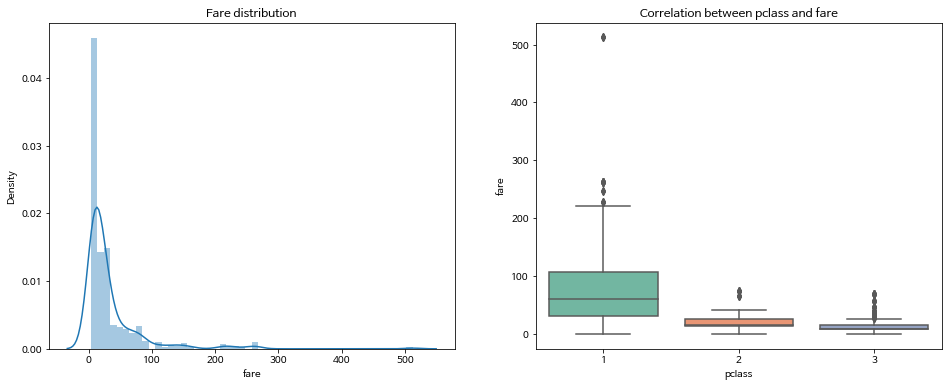

In [66]:
# fare 분포
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df[df['fare']>0]['fare']) # 지불한 운임이 0인사람 제외
plt.title('Fare distribution')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='pclass',y='fare', palette='Set2')
plt.title('Correlation between pclass and fare')
plt.show()

객실 등급 1의 티켓이 가장 비싼 티켓이고, class 1,2,3 순으로 티켓이 비싸다
객실 등급 1의 boxplot을 보면 상류층이 많다

생존률과는 상관관계가 없는거같다

###선착장 정보(Embarked)

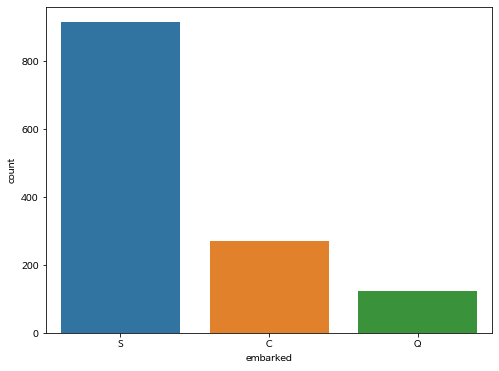

In [67]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='embarked')
plt.show()

선착장 정보가 S인 경우가 가장 많다 

생존률과는 상관관계가 없는거같다

## 여러개의 변수 분석

- 객실 등급과 형제 혹은 부부의수
- 객실 등급과 부모 혹은 자녀의수 

In [74]:
agg = {'survived':np.mean}

In [75]:
df.groupby(['pclass', 'sibsp1']).agg(agg)

survived
pclass sibsp1          
1      많음      0.833333
       없음      0.560606
       한명      0.699115
2      많음      0.538462
       없음      0.379121
       한명      0.524390
3      많음      0.148649
       없음      0.252446
       한명      0.330645

In [76]:
df.groupby(['pclass', 'parch1']).agg(agg)

survived
pclass parch1          
1      많음      0.500000
       보통      0.740260
       없음      0.582645
2      많음      1.000000
       보통      0.764706
       없음      0.310680
3      많음      0.117647
       보통      0.347826
       없음      0.236462

뚜렷한 관계가 나타나지 않는다

- 성별과 형제 혹은 부부의수
- 성별과 부모 혹은 자녀의수 

In [77]:
df.groupby(['sex', 'sibsp1']).agg(agg)

survived
sex    sibsp1          
female 많음      0.500000
       없음      0.751908
       한명      0.750000
male   많음      0.109091
       없음      0.178060
       한명      0.270440

In [78]:
df.groupby(['sex', 'parch1']).agg(agg)

survived
sex    parch1          
female 많음      0.437500
       보통      0.726115
       없음      0.744027
male   많음      0.000000
       보통      0.341270
       없음      0.166432

In [79]:
df.groupby(['sex', 'sibsp1', 'parch1']).agg(agg)

survived
sex    sibsp1 parch1          
female 많음     많음      1.000000
              보통      0.411765
              없음      0.777778
       없음     많음      0.333333
              보통      0.854839
              없음      0.731959
       한명     많음      0.444444
              보통      0.770492
              없음      0.766667
male   많음     보통      0.114286
              없음      0.100000
       없음     보통      0.454545
              없음      0.162752
       한명     많음      0.000000
              보통      0.413793
              없음      0.204301

뚜렷한 관계가 나타나지 않는다

- 성별과 나이 

In [80]:
df.groupby(['sex', 'age1']).agg(agg)

survived
sex    age1          
female 노약자   0.894737
       영유아   0.641026
       중장년   0.804196
       청년    0.648352
       청소년   0.734375
male   노약자   0.138889
       영유아   0.581395
       중장년   0.205323
       청년    0.163212
       청소년   0.113924

전체 연령대에서 성별이 여자인 사람들의 생존률이 높다 

성별과 나이 사이에 뚜렷한 관계가 나타나지 않는다




#결론
- 타이타닉호에서 생존한 사람들과 상관관계가 있는 요소들은 
- 객실등급(pclass) : 객실등급이 높을수록 생존률이 높았다
- 성별(sex) : 성별이 여자일수록 생존률이 높았다
- 나이(age) : 30대이후 부터는 생존률이 낮았고, 10세이하 영유아의 생존률이 높았다